# COGS 118A - Final Project

# Names


- Jacob Au
- Evan Liu
- Lauren Lui
- Rina Kaura

# Abstract 

The focus of our project is centered around predicting an individual’s quality of sleep based on an individual’s exercise habits and thus hopefully improving the quality of sleep. The goal of our project is to implement a model which accurately predicts and improves the quality of sleep. We will examine data collected from Lifesnaps Fitbit data which obtained various information on the exercise such as activity type, sleep duration, the amount of minutes to fall asleep, sleep efficiency, number of activity minutes, and BPM. With the collected data, we will utilize a linear regression model to make predictions and identify relationships between an individual’s quality of sleep and the exercise features as listed above. The performance of our linear regression model will be assessed using the mean absolute error (MAE), mean squared error (MSE), and the R-squared metric. 


# Background

There is a lot of prior research investigating the correlation between exercise and sleep quality. The general consensus tends to be that exercise can improve sleep quality and duration for all age groups[1]. However, some studies show that exercise has a greater positive effect on people over 40 years of age than under[2], especially when these older individuals live a rather sedentary life[4]. Exercise has also been shown to be an effective substitute for pharmacological interventions to improve sleep quality in insomniacs[3]. The participants in our dataset come from a wide range of age groups and fall everywhere on the scale of sedentary to active lifestyle. Luckily, whether their exercise consisted of walking, cycling, aerobics, or sports shouldn’t affect the effectiveness of our model since prior research shows increases in exercise intensity and duration doesn’t appear to have significant effects on sleep quality[5]. With the existing body of knowledge, we know that there is indeed a correlation between exercise and sleep that we hope to predict with our model. 
One unanswered question from the literature is how strong the correlation between exercise and sleep quality is. The studies investigating the correlation were mostly just trying to find its existence and not its strength. The studies testing the strength of the correlation had biases and limitations that call their findings into question. Many of them had a majority, if not solely, male subject group for their study which is not a representative sample. Hence, with a representative database, our group is aiming to test the correlation between exercise and sleep quality by seeing if we can successfully train a model to predict sleep quality based on type, duration, and intensity of exercise. There is a risk of there not being a strong correlation between the two variables, but that is also something our group is willing to investigate and debunk or prove.

# Problem Statement

The problem our project aims to address is improving the quality of an individual’s sleep based on one’s exercise habits, which is quantifiable, measurable, and replicable. We predict that exercise and quality of sleep must be correlated. This begs the question of how. What kind of exercise? How much exercise? When do you exercise? How do these factors affect your quality of sleep? Thanks to recent advances in personal technology, in particular the Fitbit, we are able to easily gain lots of quantitative data on people’s sleeping (rem/sleep ratio, duration, etc) and exercise habits (kind of exercise, heart rate, calories burned). Using these metrics, we should be able to accurately predict how an individual's exercising habits affect their sleep quality.


# Data

**Dataset Name:** Lifesnaps Fitbit Dataset

**Link to the dataset:** https://www.kaggle.com/datasets/skywescar/lifesnaps-fitbit-dataset

**Number of variables:** 63

**Number of observations:** 7,410

**Description:** Each observation in this dataset represents information collected regarding a specific fitbit user’s activity and device usage statistics over the course of a single day. The data from each observation was collected from one of 71 willing study participants.

**Critical Variables:** For the purposes of the present analysis, some of the notable variables from the aforementioned dataset include:
- **id:** Numeric representation of individual study participantnremhrs: Number of minutes of REM sleep logged in a single night (not hours)
- **minutesAsleep:** Number of minutes of total sleep logged in a single night
- **sleep_rem_ratio:** Proportion of sleep minutes occupied by REM sleep
- **bpm:** Average daily beats per minute
- **activityType:** List of all activities a user engaged in during a single day
- **sedentary_minutes:** Number of minutes spent idling in a single day
- **lightly_active_minutes:** Number of minutes spent engaging in light physical activity in a single day
- **moderately_active_minutes:** Number of minutes spent engaging in moderate physical activity in a single day
- **very_active_minutes:** Number of minutes spent engaging in strenuous physical activity in a single day
- **steps:** Total number of steps walked over the course of a single day

**Required Transformations:** 

Before operating on the original dataset in its given form, our group felt the need to refactor both the data and labels found within it in order to simplify the data extraction and identification processes. For example, the original dataset utilizes certain inconsistent column labeling schemes that make the task of identifying relevant columns more difficult, as in the case of camel-case labels clashing with underline-separated ones. Standardizing the naming convention of these multi-word labels, as well as refactoring labels with unintuitive names such as “nremhrs” which actually describes the number of minutes of REM sleep for a given user, is anticipated to help our group quickly and effectively utilize the dataset in our model. Additionally, given that certain metrics within the original dataset are recorded in different units despite the fact that columns with similar contents have different units, we also felt it necessary to standardize the numerous time-related metrics to be recorded in terms of minutes rather than hours and milliseconds. This transformation, we anticipated, would allow us to more easily apply a single model to our data and prevent the generation of inaccurate regression lines born from misleading numerical trends.

In addition to these standardization steps, we also felt it necessary to remove any columns in the original dataset deemed unhelpful or potentially misleading for the model training task. In particular, some of the removed metrics included ambiguous values such as “spo2” and “scl_avg” which were not explicitly defined on the FitBit SDK, values related to one’s location at various points during the day, and values related to activity in different “zones”. Additionally, while information related to each subject’s health including BMI, gender, and age were considered in our analysis of the relationship between sleep quality and exercise, our team ultimately concluded that for the purposes of the present analysis, these variables were not directly related to the amount of exercise one engages in on a given day. As a result, these values were excluded from the design matrix used in our model training procedure, but still considered as potential confounds. Finally, when measuring the sleep duration of each subject represented in the original dataset, the values represented by “minutesToFallAsleep”, “minutesAsleep”, “minutesUntilWakeup”, and “minutesAwake” were displayed separately. To simplify the process of evaluating each subject’s time spent in sleep as defined by the FitBit SDK, these columns were combined into a single column in our final dataset.

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

df = pd.read_csv("daily_fitbit_sema_df_unprocessed.csv")

In [2]:
bad_cols = ['rmssd', 'spo2', 'responsiveness_points_percentage', 'badgeType', 
            'filteredDemographicVO2Max', 'mindfulness_session', 'minutes_in_default_zone_1', 
            'minutes_below_default_zone_1', 'minutes_in_default_zone_2','nightly_temperature',
            'minutes_in_default_zone_3', 'step_goal', 'min_goal', 'max_goal', 
            'step_goal_label', 'ALERT', 'HAPPY', 'NEUTRAL', 'RESTED/RELAXED', 'date', 
            'SAD', 'TENSE/ANXIOUS', 'TIRED', 'ENTERTAINMENT', 'GYM', 'HOME', 'calories', 
            'HOME_OFFICE', 'OTHER', 'OUTDOORS', 'TRANSIT', 'WORK/SCHOOL', 
            'scl_avg', 'age', 'gender', 'bmi', 'daily_temperature_variation', 
            'full_sleep_breathing_rate', 'Unnamed: 0', 'sleep_duration', 'id']

df = df.drop(columns=bad_cols)

Removing columns with either a lot of null data or information that is not relevant to our project. For example, a user's step goal or badges they earned should not impact the quality/quantity of sleep that they are getting

In [3]:
def amountOfSleep(row):
    return row.minutesAwake + row.minutesAsleep + row.minutesToFallAsleep + row.minutesAfterWakeup
df['sleep_time'] = df.apply(amountOfSleep, axis=1)
df = df.drop(columns = ['minutesAwake', 'minutesAsleep', 
                        'minutesToFallAsleep', "minutesAfterWakeup"])

Consolidating the amount of sleep the each user is sleeping a night by using the fitbit's built partitions of parts of sleep into one variable

In [4]:
def totalActive(row):
    return row.lightly_active_minutes + row.moderately_active_minutes + row.very_active_minutes
df['active_time'] = df.apply(totalActive, axis=1)

Consolidating all of the durations of different types of exercise into one overarching value. In the future we will be using this as the signifier of how much each person exercised. A tradeoff we made is not differentiating an intense vs moderate workout in order for greater interpretability and computation cost.

In [5]:
indexSleep = df[ df['sleep_points_percentage'].isnull() ].index
df.drop(indexSleep , inplace=True)

The main dependent variable that we are trying to predict is 'sleep_points_percentage', which is a fitbit score, ranging from 0-100, quantifying the quality of a user's sleep. Upon analyzing our dataset, we realized that many users have a score of 0 for their sleep_points_percentage. By the calculation of this metric, this should not be possible, so 0 is the equivalent of a null value, so we dropped all of the rows where the score was 0.

In [6]:
df = df.reset_index(drop=True) #resetting index
df.head()

,nremhr,stress_score,sleep_points_percentage,exertion_points_percentage,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,sleep_time,active_time
0,57.432,78.0,0.833333,0.675,6517.5,['Walk'],71.701565,149.0,24.0,33.0,713.0,62.073070,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,521.0,206.0
1,57.681,80.0,0.833333,0.725,7178.6,['Walk'],70.579300,132.0,25.0,31.0,704.0,62.121476,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,548.0,188.0
2,57.481,84.0,0.966667,0.725,6090.9,['Walk'],71.842573,112.0,27.0,31.0,710.0,62.263999,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,560.0,170.0
3,57.493,82.0,0.933333,0.725,6653.1,['Walk'],71.725477,133.0,21.0,37.0,622.0,62.368900,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,627.0,191.0
4,56.750,81.0,0.866667,0.725,9557.9,['Walk'],74.401028,136.0,42.0,54.0,647.0,61.965409,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,561.0,232.0


In [7]:
def normalize(columnName):
    df[columnName] = ((df[columnName]-df[columnName].min()) / 
                      (df[columnName].max() - df[columnName].min()))
    
toBeNormalized = ['nremhr', 'stress_score', 'distance', 'bpm', 'lightly_active_minutes', 'active_time',
                  'moderately_active_minutes', 'very_active_minutes', 'sedentary_minutes', 'exertion_points_percentage',
                 'resting_hr', 'sleep_efficiency', 'steps', 'sleep_time', 'sleep_points_percentage']

df = df[df.sleep_points_percentage != 0]

for col in toBeNormalized:
    normalize(col)

Upon further analyzing our cleaned data, we realized that there is a huge discrepancy in the range of values for different features. For example, a user could have thousands of steps in a day, but their average bpm can only go so high. As a result, we decided to normalize all of the columns whos values did not orginally fall between [0-1], so future algorithms do not overweight certain features who's ranges are naturally larger. 

In [8]:
df.head()

,nremhr,stress_score,sleep_points_percentage,exertion_points_percentage,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,sleep_time,active_time
0,0.345834,0.589744,0.705882,0.380952,0.218337,['Walk'],0.234729,0.252144,0.083045,0.089431,0.553719,0.368842,0.65,1.243243,0.987013,0.921642,1.341772,0.204885,0.597641,0.232082
1,0.350680,0.641026,0.705882,0.476190,0.240483,['Walk'],0.215711,0.222985,0.086505,0.084011,0.545455,0.370130,0.70,1.466667,1.142857,0.947566,1.197531,0.225622,0.633028,0.211604
2,0.346788,0.743590,0.941176,0.476190,0.204045,['Walk'],0.237118,0.188679,0.093426,0.084011,0.550964,0.373920,0.80,1.116883,0.858974,1.015038,1.670732,0.191432,0.648755,0.191126
3,0.347021,0.692308,0.882353,0.476190,0.222879,['Walk'],0.235134,0.224700,0.072664,0.100271,0.470156,0.376709,0.65,1.128205,1.129870,1.191729,1.588235,0.209107,0.736566,0.215017
4,0.332561,0.666667,0.764706,0.476190,0.320190,['Walk'],0.280474,0.229846,0.145329,0.146341,0.493113,0.365979,0.70,0.910256,0.871795,1.211896,1.090909,0.300357,0.650066,0.261661


Here is a sample of the final dataframe we are going to be using for our analysis.

# Proposed Solution

In order to predict a user’s quality of sleep from a selection of exercising features, we will be using linear or polynomial regression. This will allow us to find the relationships between the exercise factors and sleep, and make predictions about sleep quality. In determining whether or not these relationships are significant and can be applied to the extrapolation task, the coefficient of correlation between both sleep quality and exercise data may be considered in order to assess the extent to which both variables are interrelated. Using a train-validate-test split, we will also run cross validation to make predictions on what degree of polynomial we should try to fit. After finding the best degree, we will train our data, and see how it performs on the test set.

Furthermore, if we find that we have too many columns to predict from performing the above statement, we may use **Principal Component Analysis** to reduce the dimensions, and then perform the above process again on the reduced data set. 

In addition, we would compare the performance of our model to a benchmark model. By comparing the performance of our model to the benchmark model, such as another model of a multivariable linear regression, as shown in the study below[6], it will allow us to gain information on the accuracy of our solution. The model used in Brand et al. successfully predicted sleep efficiency from increased exercise exertion, shortened sleep onset time, increased deep sleep, and decreased light sleep using multiple linear regression as utilized by our proposed model and solution. Like Brand et al., we are using four independent variables to predict one dependent variable. However, while our study is also using exercise exertion to predict sleep efficiency,  we are additionally factoring in BPM, self-reported stress, and steps taken in a day. In that way, we deviate from the existing body of research, but not enough that the benchmark model can’t be used as a precedent for our study.

# Evaluation Metrics

As the proposed analysis involves the use of a linear regression model to make predictions about sleep quality based on different exercise-related metrics, it is expected that the evaluation metrics used to quantify the performance of the model could include Mean Squared Error Score (MSE), Mean Absolute Error Score (MAE), or R-Squared Score. Preliminarily, Mean Squared Error was deemed a valid evaluation metric because it involves qualifying model performance based on differences between true and model-predicted labels, which is a task made more simple and computationally inexpensive given the aforementioned model’s inherent linear projections. Additionally, because this performance measure involves squaring the numerical differences between true and predicted values, further standardization of the original dataset to prevent the generation of negative scores would not be required, allowing models generated in successive validation folds to be compared with minimal difficulty. One concession associated with this method, however, is that because the final evaluation metric involves squaring errors, the measure is inherently sensitive to extraneous values and outliers, and given the varied values associated with the exercise and sleep columns of the target dataset, it is likely that rows exist in the dataset that could generate unwieldy evaluation scores. To address these concerns, our group also considered utilizing Mean Absolute Error to assess model performance, which substitutes the squaring process of MSE with a summation of error magnitude to address potentially negative scores. Alternatively, our group also considered substantiating the results of either of the aforementioned metrics with R-Squared scores, which qualifies model performance by taking the ratio of the sum of squared residuals and the sum of squares total, the latter of which is computed by squaring the difference between column values and the mean of that column. Inherently, this measure provides heightened interpretability compared to the other metrics, representing the degree to which the model’s performance surpasses the mean at each datapoint, with 0 representing no improvement and 1 representing perfect fit.


# Results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



## Now let's plot the linear regression fit without the outliers

(0.0, 1.0)

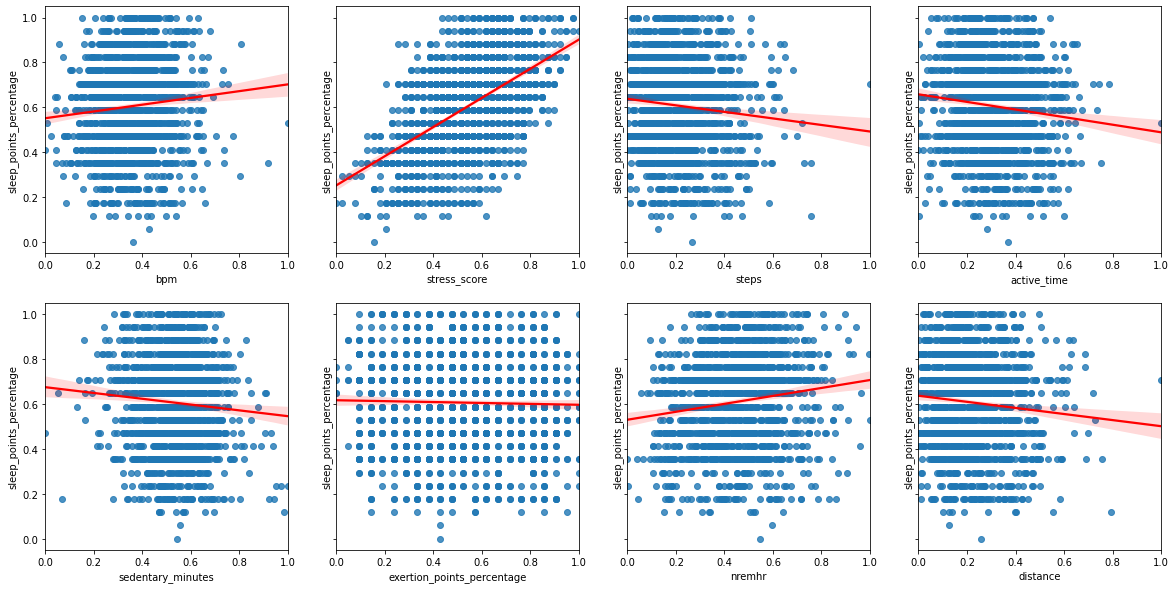

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)

sns.regplot(data = df, x = 'bpm', y = 'sleep_points_percentage', ax=axes[0][0], line_kws={"color": "red"})

sns.regplot(data = df, x = 'stress_score', y = 'sleep_points_percentage', ax=axes[0][1], line_kws={"color": "red"})#, scatter_kws={'alpha': 0.5})

sns.regplot(data = df, x = 'steps', y = 'sleep_points_percentage', ax=axes[0][2], line_kws={"color": "red"})

sns.regplot(data = df, x = 'active_time', y = 'sleep_points_percentage', ax=axes[0][3], line_kws={"color": "red"})

sns.regplot(data = df, x = 'sedentary_minutes', y = 'sleep_points_percentage', ax=axes[1][0], line_kws={"color": "red"})

sns.regplot(data = df, x = 'exertion_points_percentage', y = 'sleep_points_percentage', ax=axes[1][1], line_kws={"color": "red"})

sns.regplot(data = df, x = 'nremhr', y = 'sleep_points_percentage', ax=axes[1][2], line_kws={"color": "red"})

sns.regplot(data = df, x = 'distance', y = 'sleep_points_percentage', ax=axes[1][3], line_kws={"color": "red"})

axes[0][0].set_xlim(0,1)
axes[0][1].set_xlim(0,1)
axes[0][2].set_xlim(0,1)
axes[0][3].set_xlim(0,1)
axes[1][0].set_xlim(0,1)
axes[1][1].set_xlim(0,1)
axes[1][2].set_xlim(0,1)
axes[1][3].set_xlim(0,1)

In the graphs above we are plotting each feature in our dataset with respect to sleep_points_percentage, the value we are trying to predict. We are visualizing this in order to find a baseline hypothesis to figure out which features would be able to best predict sleep_points_percentage. Using the graphs above along with our background research, we hypothesize that stress_score, sedentary_minutes, active_time, and steps will be the best predictors of sleep quality.

In order to ascertain each user's sleep quality we will perform regressions on all possible combinations of 4 exercise-related metrics in the dataset ("stress_score", "active_time", "sedentary_time","steps"). Because neither activity or sleep are assigned an objective measure of quality in the original dataset, the snippets below are used to accomodate for this uncertainty by evaluating the predictive potential of models according to all conceivable metrics for both categories, being included under the supposition that any correlations found by any of the numerous models would shed meaningful light onto the inherent relationships between exercise and sleep quality.

When evaluating the performance, models were qualified based on coefficients of determination (R2 scores) representing the observable difference between predicted sleep quality values and their corresponding ground truth values. 

The implementation and results of the models qualifying performance according to each subject's sleep efficiency ratings are displayed in the following cells:

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from matplotlib.pyplot import figure

exercise_metrics = []
for i in range(1,6):
    combs = list(itertools.combinations(['bpm', 'stress_score', 'steps', 'active_time', 'sedentary_minutes'], i))
    for j in range(len(combs)):
        combs[j] = list(combs[j])
        exercise_metrics.append(combs[j])

In [13]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

model_map = {
    "polynomial": PolynomialRegression(),
    "tree": DecisionTreeRegressor(),
    "forest": RandomForestRegressor()
}

param_map = {
    "polynomial": {
            'polynomialfeatures__degree': [1,2,3,4,5], 'linearregression__fit_intercept': [True, False]
        },
    "tree": {'max_depth':[1, 2, 3, 4, 5] },
    "forest": {'bootstrap':[True, False], 'max_depth':[1, 2, 3]}
    
}

def cross_val_eval(model):
    
    eval_scores = []
    
    for category in exercise_metrics:

        print(category)

        training_errors = []
        validation_errors = []

        temp = df[['bpm', 'active_time', 'stress_score', 'steps', 'sedentary_minutes', 'sleep_points_percentage']].dropna()
        X = temp[category].to_numpy()

        y = temp['sleep_points_percentage'].to_numpy()

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        gscv = GridSearchCV(model_map[model], param_map[model], cv=5, scoring="r2")
        gscv.fit(x_train, y_train)
    
        scores = cross_val_score(gscv.best_estimator_, x_test, y_test,
                cv=5, scoring='r2')
        
        print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        print("\n")
        
        eval_scores.append(scores.mean())
        
    return eval_scores

In the cell below we are using the linear regression model with a grid search, 5 fold validation. We are using 70% of our data to train and the remaining 30% to test our data. We are grid searching through different degrees and fit intercept to find the hyperparameters that best fit our dataset. 

In [14]:
polyreg_scores = cross_val_eval("polynomial");

['bpm']
-0.00 accuracy with a standard deviation of 0.05


['stress_score']
0.25 accuracy with a standard deviation of 0.09


['steps']
-0.01 accuracy with a standard deviation of 0.02


['active_time']
0.02 accuracy with a standard deviation of 0.01


['sedentary_minutes']
-0.02 accuracy with a standard deviation of 0.03


['bpm', 'stress_score']
0.25 accuracy with a standard deviation of 0.06


['bpm', 'steps']
-0.01 accuracy with a standard deviation of 0.08


['bpm', 'active_time']
0.01 accuracy with a standard deviation of 0.08


['bpm', 'sedentary_minutes']
-0.05 accuracy with a standard deviation of 0.07


['stress_score', 'steps']
0.34 accuracy with a standard deviation of 0.10


['stress_score', 'active_time']
0.34 accuracy with a standard deviation of 0.09


['stress_score', 'sedentary_minutes']
0.25 accuracy with a standard deviation of 0.09


['steps', 'active_time']
0.02 accuracy with a standard deviation of 0.03


['steps', 'sedentary_minutes']
-0.00 accuracy with a stand

In the cell below we are using the decision tree regression algorithm with a grid search, 5 fold validation. We are using 70% of our data to train and the remaining 30% to test our data. We are grid searching through the maximum depth of our tree to find the hyperparameters that best fit our dataset.

In [15]:
tree_scores = cross_val_eval("tree");

['bpm']
-0.02 accuracy with a standard deviation of 0.05


['stress_score']
0.20 accuracy with a standard deviation of 0.08


['steps']
-0.05 accuracy with a standard deviation of 0.04


['active_time']
0.00 accuracy with a standard deviation of 0.03


['sedentary_minutes']
-0.02 accuracy with a standard deviation of 0.02


['bpm', 'stress_score']
0.14 accuracy with a standard deviation of 0.09


['bpm', 'steps']
-0.02 accuracy with a standard deviation of 0.05


['bpm', 'active_time']
-0.02 accuracy with a standard deviation of 0.05


['bpm', 'sedentary_minutes']
-0.02 accuracy with a standard deviation of 0.05


['stress_score', 'steps']
0.19 accuracy with a standard deviation of 0.08


['stress_score', 'active_time']
0.23 accuracy with a standard deviation of 0.08


['stress_score', 'sedentary_minutes']
0.18 accuracy with a standard deviation of 0.11


['steps', 'active_time']
0.00 accuracy with a standard deviation of 0.03


['steps', 'sedentary_minutes']
-0.12 accuracy with a stan

In the cell below we are using the ensemble random forest regression algorithm with a grid search, 5 fold validation. We are using 70% of our data to train and the remaining 30% to test our data. We are grid searching through the maximum depth of our tree and whether to bootstrap or not to find the hyperparameters that best fit our dataset.

In [16]:
forest_scores = cross_val_eval("forest")

['bpm']
-0.01 accuracy with a standard deviation of 0.05


['stress_score']
0.22 accuracy with a standard deviation of 0.09


['steps']
-0.02 accuracy with a standard deviation of 0.03


['active_time']
0.02 accuracy with a standard deviation of 0.02


['sedentary_minutes']
-0.01 accuracy with a standard deviation of 0.03


['bpm', 'stress_score']
0.21 accuracy with a standard deviation of 0.08


['bpm', 'steps']
-0.01 accuracy with a standard deviation of 0.07


['bpm', 'active_time']
0.02 accuracy with a standard deviation of 0.03


['bpm', 'sedentary_minutes']
-0.02 accuracy with a standard deviation of 0.04


['stress_score', 'steps']
0.30 accuracy with a standard deviation of 0.10


['stress_score', 'active_time']
0.31 accuracy with a standard deviation of 0.08


['stress_score', 'sedentary_minutes']
0.22 accuracy with a standard deviation of 0.11


['steps', 'active_time']
0.01 accuracy with a standard deviation of 0.02


['steps', 'sedentary_minutes']
-0.02 accuracy with a stand

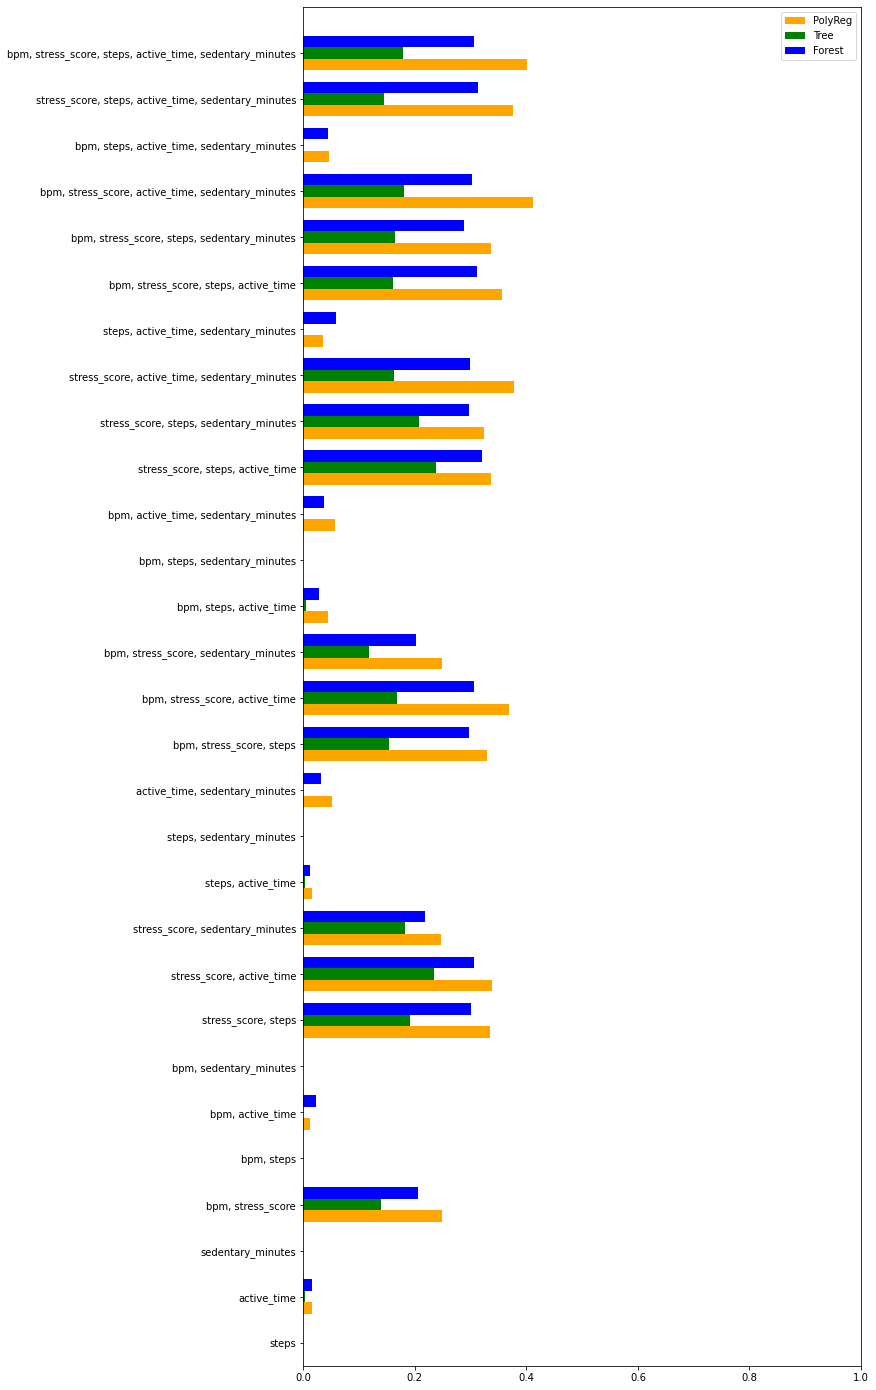

In [38]:
temp = []

for i in range(1,6):
    combs = list(itertools.combinations(['bpm', 'stress_score', 'steps', 'active_time', 'sedentary_minutes'], i))
    for j in range(len(combs)):
        combs[j] = list(combs[j])
        str = ""
        for k in range(len(combs[j])):
            str += ''.join(combs[j][k])
            str += ", "
        str = str[:-2]
        temp.append(str)

df_1 = pd.DataFrame(dict(graph=temp,n=polyreg_scores, m=tree_scores, o=forest_scores)) 

ind = np.arange(len(df_1))
width = 0.25

fig, ax = plt.subplots()
ax.barh(ind - width, df_1.n, width, color='orange', label='PolyReg')
ax.barh(ind, df_1.m, width, color='green', label='Tree')
ax.barh(ind + width, df_1.o, width, color='blue', label='Forest')

ax.set(yticks=ind, yticklabels=df_1.graph, xlim=[0, 1], ylim=[10*width - 1, len(df_1)])
ax.legend()

fig.set_figheight(25)
fig.set_figwidth(10)

plt.show()

(0.0, 1.0)

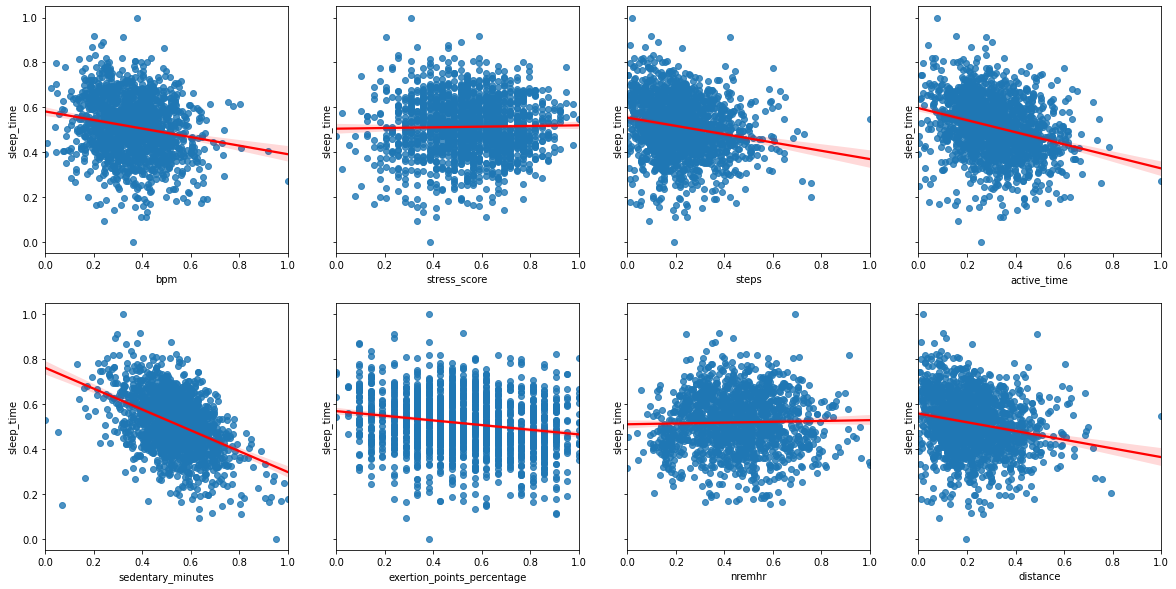

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)

sns.regplot(data = df, x = 'bpm', y = 'sleep_time', ax=axes[0][0], line_kws={"color": "red"})

sns.regplot(data = df, x = 'stress_score', y = 'sleep_time', ax=axes[0][1], line_kws={"color": "red"})#, scatter_kws={'alpha': 0.5})

sns.regplot(data = df, x = 'steps', y = 'sleep_time', ax=axes[0][2], line_kws={"color": "red"})

sns.regplot(data = df, x = 'active_time', y = 'sleep_time', ax=axes[0][3], line_kws={"color": "red"})

sns.regplot(data = df, x = 'sedentary_minutes', y = 'sleep_time', ax=axes[1][0], line_kws={"color": "red"})

sns.regplot(data = df, x = 'exertion_points_percentage', y = 'sleep_time', ax=axes[1][1], line_kws={"color": "red"})

sns.regplot(data = df, x = 'nremhr', y = 'sleep_time', ax=axes[1][2], line_kws={"color": "red"})

sns.regplot(data = df, x = 'distance', y = 'sleep_time', ax=axes[1][3], line_kws={"color": "red"})

axes[0][0].set_xlim(0,1)
axes[0][1].set_xlim(0,1)
axes[0][2].set_xlim(0,1)
axes[0][3].set_xlim(0,1)
axes[1][0].set_xlim(0,1)
axes[1][1].set_xlim(0,1)
axes[1][2].set_xlim(0,1)
axes[1][3].set_xlim(0,1)

In [39]:
def cross_val_time(model):
    
    eval_scores = []
    
    for category in exercise_metrics:

        print(category)

        training_errors = []
        validation_errors = []

        temp = df[['bpm', 'active_time', 'stress_score', 'steps', 'sedentary_minutes', 'sleep_time']].dropna()
        X = temp[category].to_numpy()
        y = temp['sleep_time'].to_numpy()

        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        gscv = GridSearchCV(model_map[model], param_map[model], cv=5, scoring="r2")
        gscv.fit(x_train, y_train)
    
        scores = cross_val_score(gscv.best_estimator_, x_test, y_test,
                cv=5, scoring='r2')
        
        print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        print("\n")
        
        eval_scores.append(scores.mean())
        
    return eval_scores

In [43]:
polyreg_scores = cross_val_time("polynomial");

['bpm']
-0.01 accuracy with a standard deviation of 0.03


['stress_score']
-0.03 accuracy with a standard deviation of 0.01


['steps']
-0.10 accuracy with a standard deviation of 0.18


['active_time']
0.04 accuracy with a standard deviation of 0.02


['sedentary_minutes']
0.18 accuracy with a standard deviation of 0.03


['bpm', 'stress_score']
-0.02 accuracy with a standard deviation of 0.03


['bpm', 'steps']
-0.06 accuracy with a standard deviation of 0.13


['bpm', 'active_time']
0.04 accuracy with a standard deviation of 0.05


['bpm', 'sedentary_minutes']
0.22 accuracy with a standard deviation of 0.05


['stress_score', 'steps']
0.01 accuracy with a standard deviation of 0.02


['stress_score', 'active_time']
0.04 accuracy with a standard deviation of 0.02


['stress_score', 'sedentary_minutes']
0.21 accuracy with a standard deviation of 0.04


['steps', 'active_time']
0.04 accuracy with a standard deviation of 0.02


['steps', 'sedentary_minutes']
0.53 accuracy with a standa

In [44]:
tree_scores = cross_val_time("tree");

['bpm']
-0.03 accuracy with a standard deviation of 0.04


['stress_score']
-0.05 accuracy with a standard deviation of 0.01


['steps']
-0.07 accuracy with a standard deviation of 0.05


['active_time']
0.03 accuracy with a standard deviation of 0.04


['sedentary_minutes']
0.11 accuracy with a standard deviation of 0.06


['bpm', 'stress_score']
-0.03 accuracy with a standard deviation of 0.06


['bpm', 'steps']
-0.02 accuracy with a standard deviation of 0.09


['bpm', 'active_time']
0.08 accuracy with a standard deviation of 0.04


['bpm', 'sedentary_minutes']
0.05 accuracy with a standard deviation of 0.14


['stress_score', 'steps']
-0.01 accuracy with a standard deviation of 0.03


['stress_score', 'active_time']
0.06 accuracy with a standard deviation of 0.03


['stress_score', 'sedentary_minutes']
0.13 accuracy with a standard deviation of 0.07


['steps', 'active_time']
0.01 accuracy with a standard deviation of 0.08


['steps', 'sedentary_minutes']
0.35 accuracy with a stand

In [41]:
forest_scores = cross_val_time("forest");

['bpm']
-0.02 accuracy with a standard deviation of 0.06


['stress_score']
-0.03 accuracy with a standard deviation of 0.01


['steps']
-0.01 accuracy with a standard deviation of 0.03


['active_time']
0.05 accuracy with a standard deviation of 0.03


['sedentary_minutes']
0.15 accuracy with a standard deviation of 0.02


['bpm', 'stress_score']
-0.01 accuracy with a standard deviation of 0.07


['bpm', 'steps']
0.00 accuracy with a standard deviation of 0.06


['bpm', 'active_time']
0.08 accuracy with a standard deviation of 0.03


['bpm', 'sedentary_minutes']
0.20 accuracy with a standard deviation of 0.04


['stress_score', 'steps']
-0.01 accuracy with a standard deviation of 0.02


['stress_score', 'active_time']
0.04 accuracy with a standard deviation of 0.02


['stress_score', 'sedentary_minutes']
0.19 accuracy with a standard deviation of 0.04


['steps', 'active_time']
0.05 accuracy with a standard deviation of 0.04


['steps', 'sedentary_minutes']
0.41 accuracy with a standa

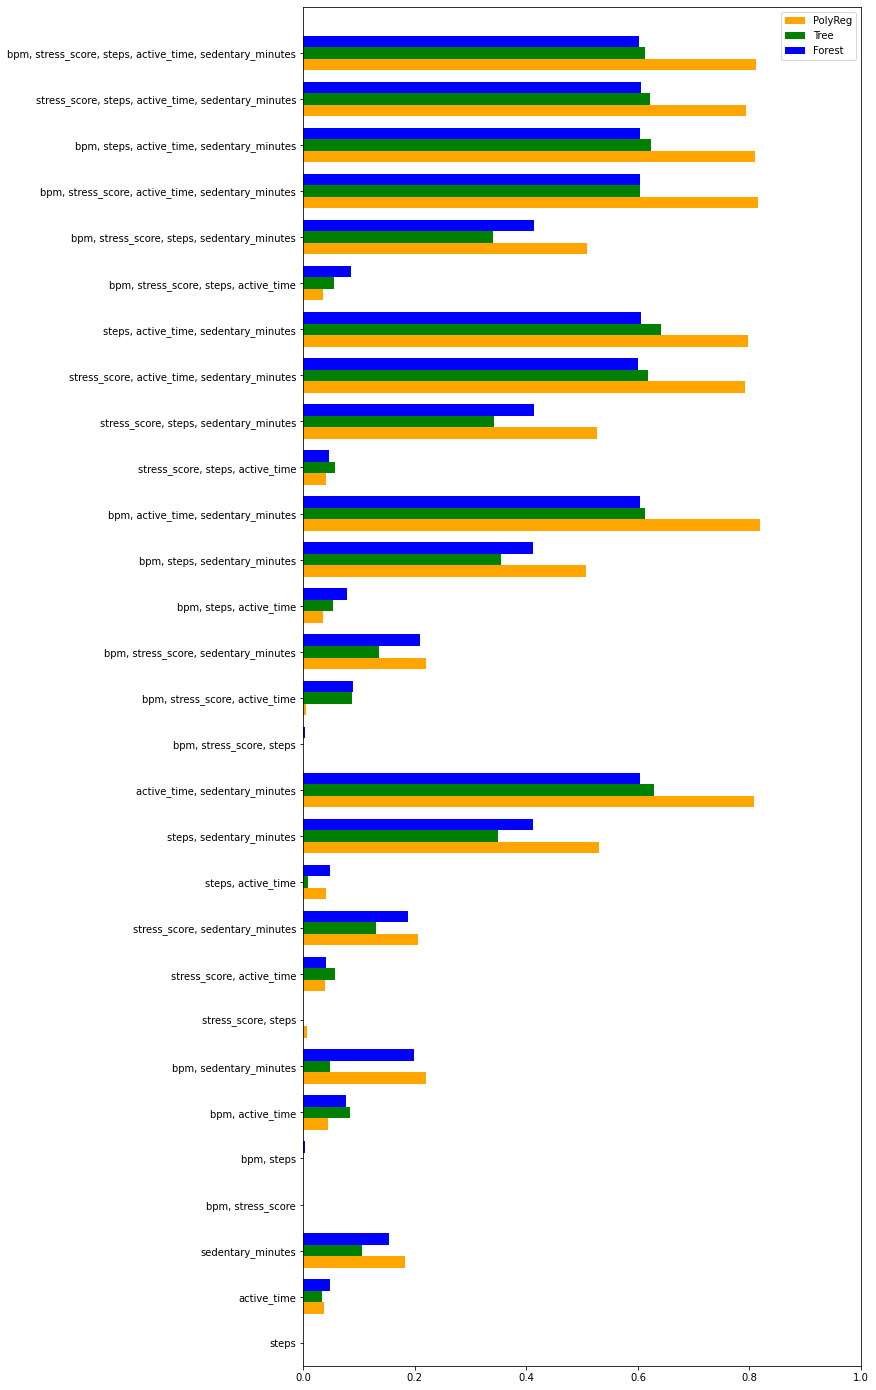

In [45]:
df_2 = pd.DataFrame(dict(graph=temp,n=polyreg_scores, m=tree_scores, o=forest_scores)) 

ind = np.arange(len(df_2))
width = 0.25

fig, ax = plt.subplots()
ax.barh(ind - width, df_2.n, width, color='orange', label='PolyReg')
ax.barh(ind, df_2.m, width, color='green', label='Tree')
ax.barh(ind + width, df_2.o, width, color='blue', label='Forest')

ax.set(yticks=ind, yticklabels=df_2.graph, xlim=[0, 1], ylim=[10*width - 1, len(df_2)])
ax.legend()

fig.set_figheight(25)
fig.set_figwidth(10)

plt.show()

# NEW STUFF

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?


# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.


# Ethics & Privacy

As our dataset has a lot of personal health and exercise information, it is important that our participants remain anonymous. Although the participants gave consent to participate in the study and the data was collected unobtrusively, through a fitbit, it is possible to backtrack their identities in conjunction with their demographic information. Furthermore, because our project is so aligned with discovering what constitutes healthy exercising and sleeping patterns, we may be unintentionally promoting unhealthy exercise, dietary, and sleep habits. Health is not a one size fits all type situation, so we will take extra caution when discussing our findings.


### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   


### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.